# Simple Linear Regression

We will show how to use linear regression to find a best fit line through an artificial 2D scatter plot generated from a line with Gaussian noise added.

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from mltools.glm import LinearRegression
from mltools.optimization import GradientDescent
from mltools.visualization import abline

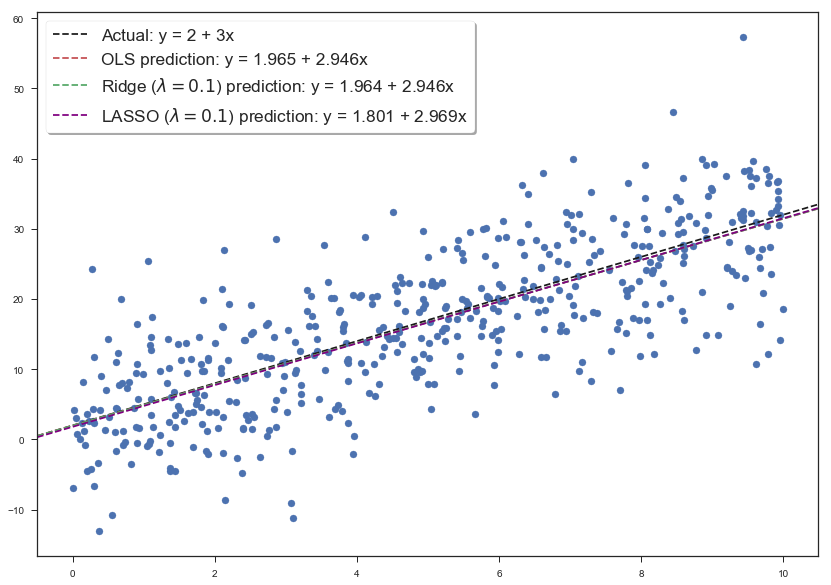

In [2]:
n = 500
slope = 3
intercept = 2

np.random.seed(100)
x = np.random.uniform(0, 10, n)
y = slope * x + intercept + np.random.normal(0, 7, n)

# Ordinary least squares
lm = LinearRegression(standardize=False)
lm.fit(x, y)

# Ridge regression
lm_ridge = LinearRegression(penalty="l2", standardize=False)
lm_ridge.fit(x, y)

# LASSO regression
lm_lasso = LinearRegression(penalty="l1", standardize=False)
lm_lasso.fit(x, y, optimizer=GradientDescent(iterations=10000, rate=0.01))

plt.figure(figsize=(14, 10))
sns.set(style="ticks", color_codes=True)
plt.scatter(x, y)

abline(intercept, slope, ls="--", c="k", label=f"Actual: y = {intercept} + {slope}x")
abline(lm._weights[0], lm._weights[1], ls="--", c="r",
       label=f"OLS prediction: y = {lm._weights[0]:.3f} + {lm._weights[1]:.3f}x")
abline(lm_ridge._weights[0], lm_ridge._weights[1], ls="--", c="g",
       label=f"Ridge ($\lambda={lm_ridge.lam}$) prediction: y = {lm_ridge._weights[0]:.3f} + {lm_ridge._weights[1]:.3f}x")
abline(lm_lasso._weights[0], lm_lasso._weights[1], ls="--", c="purple",
       label=f"LASSO ($\lambda={lm_lasso.lam}$) prediction: y = {lm_lasso._weights[0]:.3f} + {lm_lasso._weights[1]:.3f}x")

plt.legend(loc="best", fontsize="x-large", frameon=True, shadow=True)

plt.show()
plt.close()

## Mean Squared Error

To evaluate this model's performance, we compute its *mean squared error* on the data set:
$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^n \left(y_i - \widehat{y}_i\right)^2.
$$
Here $n$ is the number of observations, $y_i$ is the $i$th observed value, and $\widehat{y}_i$ is the least squares estimate corresponding to the $i$th data point.
A good regressor achieves an MLE close to zero.

In [3]:
y_true = slope * x + intercept
y_pred = lm.predict(x)
mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse:.5f}")

MSE: 0.11550
